In [1]:
 pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing required libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Step 1: Data Gathering
Fetching data through News_API

In [3]:
r=requests.get('https://newsapi.org/v2/everything?q=technology&from=2022-12-23&sortBy=publishedAt&apiKey=3dc006a9948c45e296455ce504a111c0')
r

<Response [200]>

In [4]:
r.content

b'{"status":"ok","totalResults":3497,"articles":[{"source":{"id":null,"name":"GameSpot"},"author":"Darryn Bonthuys","title":"Street Fighter 6 - Everything We Know About The Capcom Fighting Game","description":"Mainline entries in the Street Fighter series don\'t roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom\'s iconic fighting game franchise is shaping up to not only be a visually impressive and hard-hitting new cha\xe2\x80\xa6","url":"https://www.gamespot.com/articles/street-fighter-6-everything-we-know-about-the-capcom-fighting-game/1100-6510023/","urlToImage":"https://www.gamespot.com/a/uploads/screen_kubrick/1601/16018044/4076872-streetfighter6%284%29.jpg","publishedAt":"2022-12-25T14:00:00Z","content":"Mainline entries in the Street Fighter series don\'t roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom\'s iconic fighting game franchise is shaping up t\xe2\x80\xa6 [+7277 chars]"},{

In [5]:
# Loading the data int a varible
tech=json.loads(r.content)
tech

{'status': 'ok',
 'totalResults': 3497,
 'articles': [{'source': {'id': None, 'name': 'GameSpot'},
   'author': 'Darryn Bonthuys',
   'title': 'Street Fighter 6 - Everything We Know About The Capcom Fighting Game',
   'description': "Mainline entries in the Street Fighter series don't roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom's iconic fighting game franchise is shaping up to not only be a visually impressive and hard-hitting new cha…",
   'url': 'https://www.gamespot.com/articles/street-fighter-6-everything-we-know-about-the-capcom-fighting-game/1100-6510023/',
   'urlToImage': 'https://www.gamespot.com/a/uploads/screen_kubrick/1601/16018044/4076872-streetfighter6%284%29.jpg',
   'publishedAt': '2022-12-25T14:00:00Z',
   'content': "Mainline entries in the Street Fighter series don't roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom's iconic fighting game franchise is shaping up t…

In [6]:
# Removing unrequired data
tech=tech['articles']
tech

[{'source': {'id': None, 'name': 'GameSpot'},
  'author': 'Darryn Bonthuys',
  'title': 'Street Fighter 6 - Everything We Know About The Capcom Fighting Game',
  'description': "Mainline entries in the Street Fighter series don't roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom's iconic fighting game franchise is shaping up to not only be a visually impressive and hard-hitting new cha…",
  'url': 'https://www.gamespot.com/articles/street-fighter-6-everything-we-know-about-the-capcom-fighting-game/1100-6510023/',
  'urlToImage': 'https://www.gamespot.com/a/uploads/screen_kubrick/1601/16018044/4076872-streetfighter6%284%29.jpg',
  'publishedAt': '2022-12-25T14:00:00Z',
  'content': "Mainline entries in the Street Fighter series don't roll out too often, but come 2023, a new challenger arises in the form of Street Fighter 6. Capcom's iconic fighting game franchise is shaping up t… [+7277 chars]"},
 {'source': {'id': None, 'name': 'Forbes'}

In [7]:
# Converting the data into json format for further process
with open('tech.json', 'w') as f:
    json.dump(tech, f)

In [8]:
# Converting the data from json to csv format to start the sentiment analysis
df = pd.read_json (r'tech.json')
df.to_csv (r'techarticles.csv')

In [9]:
df1=pd.read_csv('techarticles.csv')
df1

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,"{'id': None, 'name': 'GameSpot'}",Darryn Bonthuys,Street Fighter 6 - Everything We Know About Th...,Mainline entries in the Street Fighter series ...,https://www.gamespot.com/articles/street-fight...,https://www.gamespot.com/a/uploads/screen_kubr...,2022-12-25T14:00:00Z,Mainline entries in the Street Fighter series ...
1,1,"{'id': None, 'name': 'Forbes'}","Shep Hyken, Contributor, \n Shep Hyken, Contri...",Are You As Good As You Think You Are? The Big ...,Even though we may think we’re good at respond...,https://www.forbes.com/sites/shephyken/2022/12...,https://imageio.forbes.com/specials-images/ima...,2022-12-25T14:00:00Z,Even though we may think were good at respondi...
2,2,"{'id': None, 'name': 'Seeking Alpha'}",Retired Investor,EEMS Vs. FEMS: Comparing Small-Cap Emerging Ma...,EEMS and FEMS and their respective index are r...,https://seekingalpha.com/article/4565551-eems-...,https://static.seekingalpha.com/cdn/s3/uploads...,2022-12-25T14:00:00Z,William_Potter\r\n(This article was co-produce...
3,3,"{'id': 'business-insider', 'name': 'Business I...","zrosenberg@insider.com (Zoe Rosenberg,Robert D...",29 must-read books to be successful in real es...,Rising stars in the real-estate industry draw ...,https://www.businessinsider.com/real-estate-bo...,https://i.insider.com/63a5edd7f0d34c0018bc4173...,2022-12-25T14:00:00Z,Careers in real estate vary from brokers and l...
4,4,"{'id': None, 'name': 'Mirror Online'}",mirrornews@mirror.co.uk (Josh O'Brien),Jose Mourinho’s sarcastic dig at Premier Leagu...,A LOOK BACK: The Premier League festive calend...,https://www.mirror.co.uk/sport/football/news/j...,https://i2-prod.mirror.co.uk/incoming/article2...,2022-12-25T14:00:00Z,Jose Mourinho has never been particularly shy ...
...,...,...,...,...,...,...,...,...,...
95,95,"{'id': None, 'name': 'Chicago Tribune'}","Annie Sweeney, Erin Hooley",Sandra Brown beat the odds to get a college ed...,"Sandra Brown, against huge odds, earned a bach...",https://www.chicagotribune.com/news/criminal-j...,https://www.chicagotribune.com/resizer/LL3KVLI...,2022-12-25T11:00:00Z,Sandra Brown walked gingerly down a walkway to...
96,96,"{'id': None, 'name': 'Süddeutsche Zeitung'}",Von Catherine Hoffmann,SZ-Serie: Münchens junge Unternehmen: Smart au...,"Tado hat intelligente Thermostate entwickelt, ...",https://www.sueddeutsche.de/muenchen/muenchen-...,https://www.sueddeutsche.de/image/sz.1.5721075...,2022-12-25T10:52:33Z,"Tado hat intelligente Thermostate entwickelt, ..."
97,97,"{'id': None, 'name': 'Beststocks.com'}",Roberto Liccardo,SK Telecom Company Limited (NYSE:SKM) StockNew...,In a report made available for public consumpt...,https://beststocks.com/sk-telecom-company-limi...,https://beststocks.com/wp-content/uploads/2022...,2022-12-25T10:49:21Z,In a report made available for public consumpt...
98,98,"{'id': None, 'name': 'Sputnik International'}",Muhammad Osman,Researchers Recreate Two Facial Depictions of ...,Pharaoh Ramses II belongs to the nineteenth dy...,https://sputniknews.com/20221225/researchers-r...,https://cdnn1.img.sputniknews.com/images/shari...,2022-12-25T10:40:19Z,Get the latest Africa news from Sputnik: break...


In [10]:
# Seperating the article publish time
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'])
df1['Date'] = df1['publishedAt'].dt.date
df1['Date'] = df1['publishedAt'].dt.strftime('%Y-%m-%d')
df1['Time'] = df1['publishedAt'].dt.time
df1

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content,Date,Time
0,0,"{'id': None, 'name': 'GameSpot'}",Darryn Bonthuys,Street Fighter 6 - Everything We Know About Th...,Mainline entries in the Street Fighter series ...,https://www.gamespot.com/articles/street-fight...,https://www.gamespot.com/a/uploads/screen_kubr...,2022-12-25 14:00:00+00:00,Mainline entries in the Street Fighter series ...,2022-12-25,14:00:00
1,1,"{'id': None, 'name': 'Forbes'}","Shep Hyken, Contributor, \n Shep Hyken, Contri...",Are You As Good As You Think You Are? The Big ...,Even though we may think we’re good at respond...,https://www.forbes.com/sites/shephyken/2022/12...,https://imageio.forbes.com/specials-images/ima...,2022-12-25 14:00:00+00:00,Even though we may think were good at respondi...,2022-12-25,14:00:00
2,2,"{'id': None, 'name': 'Seeking Alpha'}",Retired Investor,EEMS Vs. FEMS: Comparing Small-Cap Emerging Ma...,EEMS and FEMS and their respective index are r...,https://seekingalpha.com/article/4565551-eems-...,https://static.seekingalpha.com/cdn/s3/uploads...,2022-12-25 14:00:00+00:00,William_Potter\r\n(This article was co-produce...,2022-12-25,14:00:00
3,3,"{'id': 'business-insider', 'name': 'Business I...","zrosenberg@insider.com (Zoe Rosenberg,Robert D...",29 must-read books to be successful in real es...,Rising stars in the real-estate industry draw ...,https://www.businessinsider.com/real-estate-bo...,https://i.insider.com/63a5edd7f0d34c0018bc4173...,2022-12-25 14:00:00+00:00,Careers in real estate vary from brokers and l...,2022-12-25,14:00:00
4,4,"{'id': None, 'name': 'Mirror Online'}",mirrornews@mirror.co.uk (Josh O'Brien),Jose Mourinho’s sarcastic dig at Premier Leagu...,A LOOK BACK: The Premier League festive calend...,https://www.mirror.co.uk/sport/football/news/j...,https://i2-prod.mirror.co.uk/incoming/article2...,2022-12-25 14:00:00+00:00,Jose Mourinho has never been particularly shy ...,2022-12-25,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...
95,95,"{'id': None, 'name': 'Chicago Tribune'}","Annie Sweeney, Erin Hooley",Sandra Brown beat the odds to get a college ed...,"Sandra Brown, against huge odds, earned a bach...",https://www.chicagotribune.com/news/criminal-j...,https://www.chicagotribune.com/resizer/LL3KVLI...,2022-12-25 11:00:00+00:00,Sandra Brown walked gingerly down a walkway to...,2022-12-25,11:00:00
96,96,"{'id': None, 'name': 'Süddeutsche Zeitung'}",Von Catherine Hoffmann,SZ-Serie: Münchens junge Unternehmen: Smart au...,"Tado hat intelligente Thermostate entwickelt, ...",https://www.sueddeutsche.de/muenchen/muenchen-...,https://www.sueddeutsche.de/image/sz.1.5721075...,2022-12-25 10:52:33+00:00,"Tado hat intelligente Thermostate entwickelt, ...",2022-12-25,10:52:33
97,97,"{'id': None, 'name': 'Beststocks.com'}",Roberto Liccardo,SK Telecom Company Limited (NYSE:SKM) StockNew...,In a report made available for public consumpt...,https://beststocks.com/sk-telecom-company-limi...,https://beststocks.com/wp-content/uploads/2022...,2022-12-25 10:49:21+00:00,In a report made available for public consumpt...,2022-12-25,10:49:21
98,98,"{'id': None, 'name': 'Sputnik International'}",Muhammad Osman,Researchers Recreate Two Facial Depictions of ...,Pharaoh Ramses II belongs to the nineteenth dy...,https://sputniknews.com/20221225/researchers-r...,https://cdnn1.img.sputniknews.com/images/shari...,2022-12-25 10:40:19+00:00,Get the latest Africa news from Sputnik: break...,2022-12-25,10:40:19


# Step 2: Filtering Data
For Sentimental Analysis

In [11]:
# Performing fancy indexing to selecting the import columns for sentiment analysis
df2=df1[['Time','Date','author','title','description','url']]
df2

,Time,Date,author,title,description,url
0,14:00:00,2022-12-25,Darryn Bonthuys,Street Fighter 6 - Everything We Know About Th...,Mainline entries in the Street Fighter series ...,https://www.gamespot.com/articles/street-fight...
1,14:00:00,2022-12-25,"Shep Hyken, Contributor, \n Shep Hyken, Contri...",Are You As Good As You Think You Are? The Big ...,Even though we may think we’re good at respond...,https://www.forbes.com/sites/shephyken/2022/12...
2,14:00:00,2022-12-25,Retired Investor,EEMS Vs. FEMS: Comparing Small-Cap Emerging Ma...,EEMS and FEMS and their respective index are r...,https://seekingalpha.com/article/4565551-eems-...
3,14:00:00,2022-12-25,"zrosenberg@insider.com (Zoe Rosenberg,Robert D...",29 must-read books to be successful in real es...,Rising stars in the real-estate industry draw ...,https://www.businessinsider.com/real-estate-bo...
4,14:00:00,2022-12-25,mirrornews@mirror.co.uk (Josh O'Brien),Jose Mourinho’s sarcastic dig at Premier Leagu...,A LOOK BACK: The Premier League festive calend...,https://www.mirror.co.uk/sport/football/news/j...
...,...,...,...,...,...,...
95,11:00:00,2022-12-25,"Annie Sweeney, Erin Hooley",Sandra Brown beat the odds to get a college ed...,"Sandra Brown, against huge odds, earned a bach...",https://www.chicagotribune.com/news/criminal-j...
96,10:52:33,2022-12-25,Von Catherine Hoffmann,SZ-Serie: Münchens junge Unternehmen: Smart au...,"Tado hat intelligente Thermostate entwickelt, ...",https://www.sueddeutsche.de/muenchen/muenchen-...
97,10:49:21,2022-12-25,Roberto Liccardo,SK Telecom Company Limited (NYSE:SKM) StockNew...,In a report made available for public consumpt...,https://beststocks.com/sk-telecom-company-limi...
98,10:40:19,2022-12-25,Muhammad Osman,Researchers Recreate Two Facial Depictions of ...,Pharaoh Ramses II belongs to the nineteenth dy...,https://sputniknews.com/20221225/researchers-r...


In [12]:
df2['Date'].unique()

array(['2022-12-25'], dtype=object)

- Here we can see that in the date column there is only one date exist ie. 24-12-22
- So we can remove the date column because now we know that all the articles published on the date 24 december 2022.

In [20]:
df3=df2[['Time','author','title','description','url']]
df3

,Time,author,title,description,url
0,14:00:00,Darryn Bonthuys,Street Fighter 6 - Everything We Know About Th...,Mainline entries in the Street Fighter series ...,https://www.gamespot.com/articles/street-fight...
1,14:00:00,"Shep Hyken, Contributor, \n Shep Hyken, Contri...",Are You As Good As You Think You Are? The Big ...,Even though we may think we’re good at respond...,https://www.forbes.com/sites/shephyken/2022/12...
2,14:00:00,Retired Investor,EEMS Vs. FEMS: Comparing Small-Cap Emerging Ma...,EEMS and FEMS and their respective index are r...,https://seekingalpha.com/article/4565551-eems-...
3,14:00:00,"zrosenberg@insider.com (Zoe Rosenberg,Robert D...",29 must-read books to be successful in real es...,Rising stars in the real-estate industry draw ...,https://www.businessinsider.com/real-estate-bo...
4,14:00:00,mirrornews@mirror.co.uk (Josh O'Brien),Jose Mourinho’s sarcastic dig at Premier Leagu...,A LOOK BACK: The Premier League festive calend...,https://www.mirror.co.uk/sport/football/news/j...
...,...,...,...,...,...
95,11:00:00,"Annie Sweeney, Erin Hooley",Sandra Brown beat the odds to get a college ed...,"Sandra Brown, against huge odds, earned a bach...",https://www.chicagotribune.com/news/criminal-j...
96,10:52:33,Von Catherine Hoffmann,SZ-Serie: Münchens junge Unternehmen: Smart au...,"Tado hat intelligente Thermostate entwickelt, ...",https://www.sueddeutsche.de/muenchen/muenchen-...
97,10:49:21,Roberto Liccardo,SK Telecom Company Limited (NYSE:SKM) StockNew...,In a report made available for public consumpt...,https://beststocks.com/sk-telecom-company-limi...
98,10:40:19,Muhammad Osman,Researchers Recreate Two Facial Depictions of ...,Pharaoh Ramses II belongs to the nineteenth dy...,https://sputniknews.com/20221225/researchers-r...


# Step 3: Sentimental Analysis

In [21]:
# Creating a new column which will show the polarity of the tile with the help of Textblob library
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

df3['Polarity']= df['title'].apply(getpolarity)

In [22]:
df3.head()

,Time,author,title,description,url,Polarity
0,14:00:00,Darryn Bonthuys,Street Fighter 6 - Everything We Know About Th...,Mainline entries in the Street Fighter series ...,https://www.gamespot.com/articles/street-fight...,-0.4000
1,14:00:00,"Shep Hyken, Contributor, \n Shep Hyken, Contri...",Are You As Good As You Think You Are? The Big ...,Even though we may think we’re good at respond...,https://www.forbes.com/sites/shephyken/2022/12...,0.3500
2,14:00:00,Retired Investor,EEMS Vs. FEMS: Comparing Small-Cap Emerging Ma...,EEMS and FEMS and their respective index are r...,https://seekingalpha.com/article/4565551-eems-...,0.0000
3,14:00:00,"zrosenberg@insider.com (Zoe Rosenberg,Robert D...",29 must-read books to be successful in real es...,Rising stars in the real-estate industry draw ...,https://www.businessinsider.com/real-estate-bo...,0.2875
4,14:00:00,mirrornews@mirror.co.uk (Josh O'Brien),Jose Mourinho’s sarcastic dig at Premier Leagu...,A LOOK BACK: The Premier League festive calend...,https://www.mirror.co.uk/sport/football/news/j...,0.1000


In [23]:
# Function to check if the sentiments of the title is posative, negative or neutral.
def getsentiment(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Posative'
    
df3['Sentiments']=df3['Polarity'].apply(getsentiment)

In [24]:
df3.sample(5)

,Time,author,title,description,url,Polarity,Sentiments
58,12:04:00,Press Trust of India,Sensex navigates geopolitical gyrations to out...,"After a two-year liquidity-fuelled bull run, t...",https://www.business-standard.com/article/mark...,0.000000,Neutral
82,11:21:05,MarketScreener,Israel regulator awards licence to investors t...,(marketscreener.com) Israel's banking regulato...,https://www.marketscreener.com/quote/currency/...,0.068182,Posative
95,11:00:00,"Annie Sweeney, Erin Hooley",Sandra Brown beat the odds to get a college ed...,"Sandra Brown, against huge odds, earned a bach...",https://www.chicagotribune.com/news/criminal-j...,0.400000,Posative
25,13:00:12,Christopher Coke,HyperX ProCast XLR Microphone Review: Good Sou...,The HyperX ProCast is a good XLR microphone wi...,https://www.tomshardware.com/reviews/hyperx-pr...,0.200000,Posative
14,13:23:58,AnandK@TWC,What is Bootstrapper.exe? Fix Bootstrapper sto...,"In this post, we will show you how to fix Micr...",https://www.thewindowsclub.com/what-is-bootstr...,0.000000,Neutral


## Performing data vizualization to see the conclusion of sentimental analysis

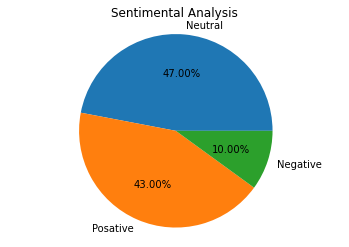

In [25]:
plt.title('Sentimental Analysis')
label=['Neutral','Posative','Negative']
plt.pie(df3['Sentiments'].value_counts(),labels=label, radius=1.5, autopct='%0.2f%%')
plt.axis("equal")
plt.show()

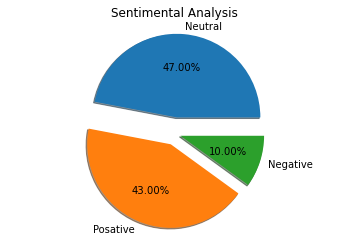

In [26]:
plt.title('Sentimental Analysis')
label=['Neutral','Posative','Negative']
plt.pie(df3['Sentiments'].value_counts(),labels=label, radius=1.5, shadow='true', explode=[0.3,0.2,0.1], autopct='%0.2f%%')
plt.axis("equal")
plt.show()

##### Conclusion of Sentimental Analysis
- In our dataset:
  1. 57 percent of the articles published in one day are Neutral.
  2. 36 percent of the articles published in one day are Posative.
  3. 7 percent of the articles published in one day are Negative.